In [18]:
# 導入必要的庫
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
# 設置中文字體
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei', 'SimHei', 'Arial Unicode MS']  # 優先使用微軟正黑體
plt.rcParams['axes.unicode_minus'] = False  # 解決負號顯示問題


In [5]:
# 讀取數據
df = pd.read_csv('personality_dataset.csv')

In [ ]:
# 顯示數據基本信息
print("數據集形狀:", df.shape)
print("數據集前5行:")
df.head()

# 檢查缺失值
print("缺失值統計:")
df.isnull().sum()

數據集形狀: (2900, 8)
數據集前5行:


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [12]:
# 數據預處理
# 處理缺失值
numeric_columns = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 
                  'Friends_circle_size', 'Post_frequency']
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# 將分類變量轉換為數值
df['Stage_fear'] = df['Stage_fear'].map({'Yes': 1, 'No': 0})
df['Drained_after_socializing'] = df['Drained_after_socializing'].map({'Yes': 1, 'No': 0})
df['Personality'] = df['Personality'].map({'Introvert': 0, 'Extrovert': 1})

# 確保所有數值列都是浮點數類型
for col in numeric_columns:
    df[col] = df[col].astype(float)

In [13]:
# 將分類變量轉換為數值
df['Stage_fear'] = df['Stage_fear'].map({'Yes': 1, 'No': 0})
df['Drained_after_socializing'] = df['Drained_after_socializing'].map({'Yes': 1, 'No': 0})
df['Personality'] = df['Personality'].map({'Introvert': 0, 'Extrovert': 1})

In [29]:

# 檢查處理後的數據
print("處理後的數據類型:")
print(df.dtypes)
print("Personality 的唯一值：", df['Personality'].unique())
print("每個性格類型的數量：")
print(df['Personality'].value_counts())

處理後的數據類型:
Time_spent_Alone             float64
Stage_fear                   float64
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing    float64
Friends_circle_size          float64
Post_frequency               float64
Personality                    int64
dtype: object
Personality 的唯一值： [1 0]
每個性格類型的數量：
Personality
1    1491
0    1409
Name: count, dtype: int64


In [14]:
# 顯示處理後的數據
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,NaN,4.0,6.0,NaN,13.0,5.0,NaN
1,9.0,NaN,0.0,0.0,NaN,0.0,3.0,NaN
2,9.0,NaN,1.0,2.0,NaN,5.0,2.0,NaN
3,0.0,NaN,6.0,7.0,NaN,14.0,8.0,NaN
4,3.0,NaN,9.0,4.0,NaN,8.0,5.0,NaN


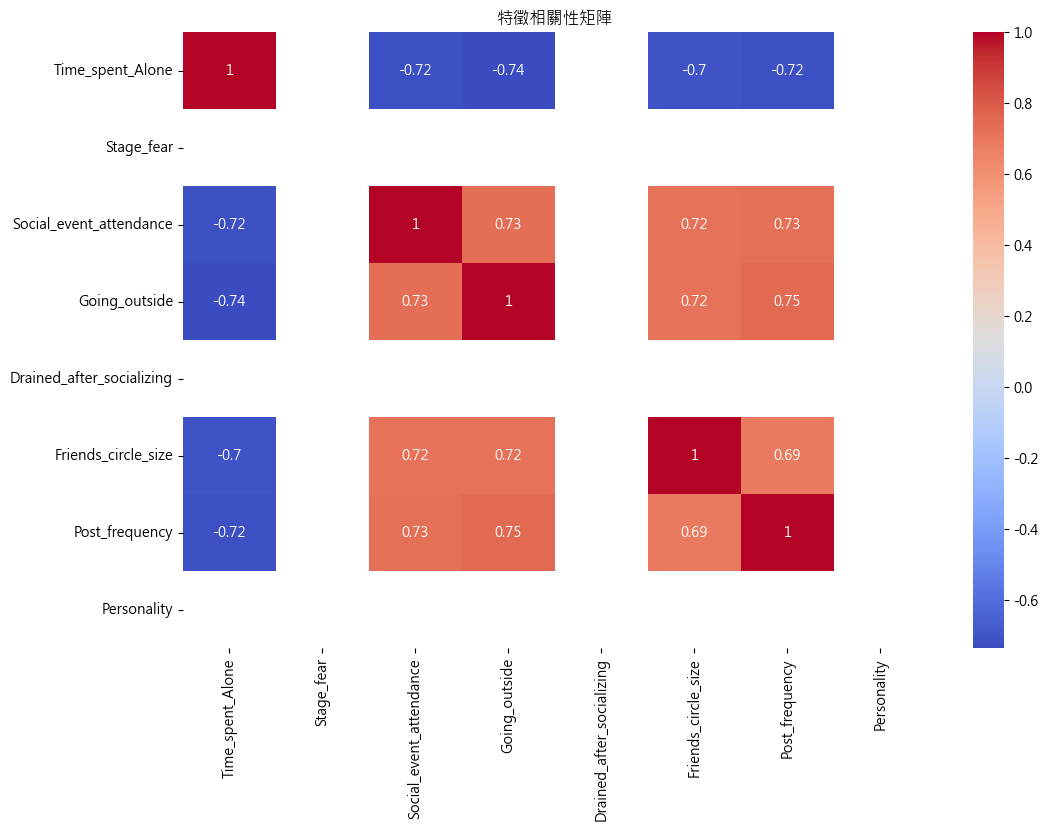

In [ ]:
# 特徵分析
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('特徵相關性矩陣')
plt.show()

C:\Users\y4611\AppData\Local\Temp\ipykernel_14132\1002677232.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['內向', '外向'])
C:\Users\y4611\AppData\Local\Temp\ipykernel_14132\1002677232.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['內向', '外向'])
C:\Users\y4611\AppData\Local\Temp\ipykernel_14132\1002677232.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(['內向', '外向'])
C:\Users\y4611\AppData\Local\Temp\ipykernel_14132\1002677232.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(['內向', '外向'])


<Figure size 1500x1200 with 0 Axes>

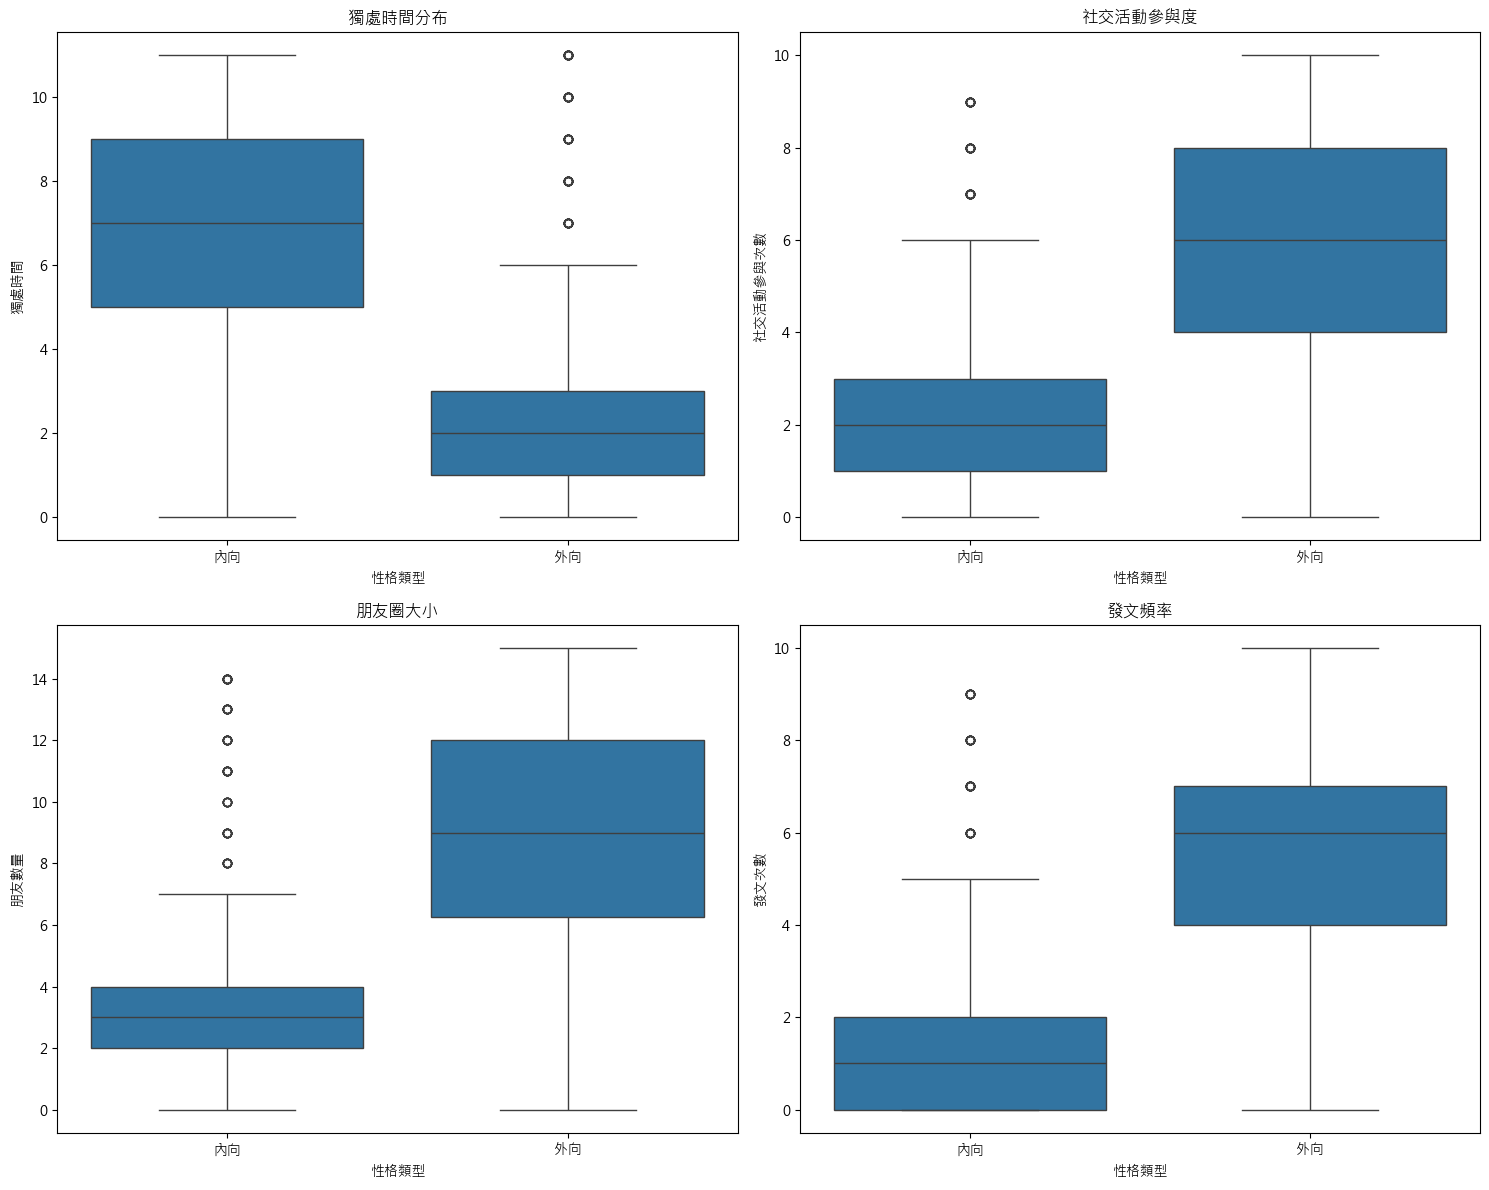

In [30]:

# 可視化分析
plt.figure(figsize=(15, 12))

# 創建子圖
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 獨處時間分布
sns.boxplot(x='Personality', y='Time_spent_Alone', data=df, ax=ax1)
ax1.set_title('獨處時間分布')
ax1.set_xlabel('性格類型')
ax1.set_ylabel('獨處時間')
ax1.set_xticklabels(['內向', '外向'])

# 社交活動參與度
sns.boxplot(x='Personality', y='Social_event_attendance', data=df, ax=ax2)
ax2.set_title('社交活動參與度')
ax2.set_xlabel('性格類型')
ax2.set_ylabel('社交活動參與次數')
ax2.set_xticklabels(['內向', '外向'])

# 朋友圈大小
sns.boxplot(x='Personality', y='Friends_circle_size', data=df, ax=ax3)
ax3.set_title('朋友圈大小')
ax3.set_xlabel('性格類型')
ax3.set_ylabel('朋友數量')
ax3.set_xticklabels(['內向', '外向'])

# 發文頻率
sns.boxplot(x='Personality', y='Post_frequency', data=df, ax=ax4)
ax4.set_title('發文頻率')
ax4.set_xlabel('性格類型')
ax4.set_ylabel('發文次數')
ax4.set_xticklabels(['內向', '外向'])

plt.tight_layout()
plt.show()




分類報告:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       278
           1       0.93      0.91      0.92       302

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



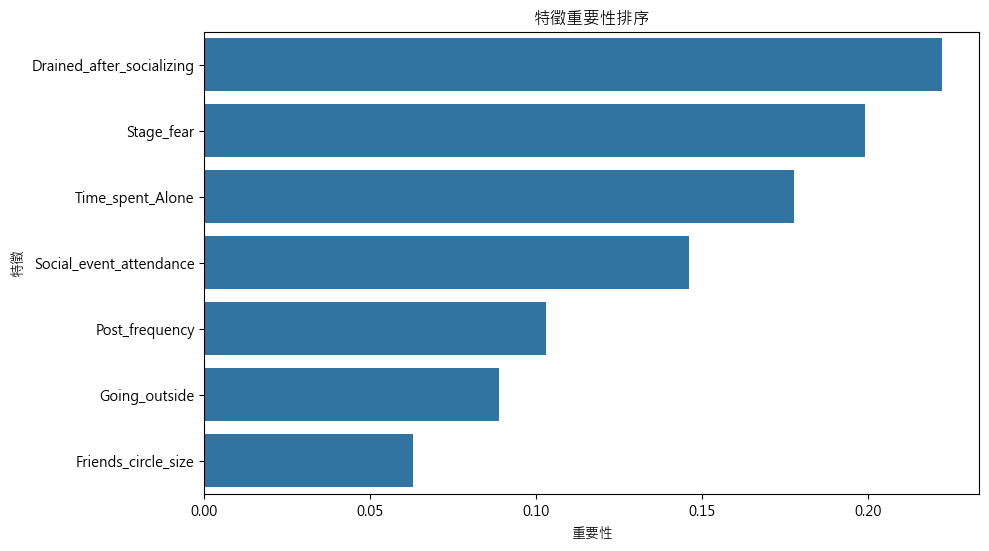

In [26]:
# 準備機器學習模型\n",
X = df.drop('Personality', axis=1)
y = df['Personality']

# 分割訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 特徵標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 訓練隨機森林模型
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# 模型評估
y_pred = rf_model.predict(X_test_scaled)
print("分類報告:")
print(classification_report(y_test, y_pred))

# 特徵重要性
feature_importance = pd.DataFrame({
    '特徵': X.columns,
    '重要性': rf_model.feature_importances_
    })
feature_importance = feature_importance.sort_values('重要性', ascending=False)
    
plt.figure(figsize=(10, 6))
sns.barplot(x='重要性', y='特徵', data=feature_importance)
plt.title('特徵重要性排序')
plt.show()